In [8]:
from google.colab import files
uploaded = files.upload()

### fazer upload dos arquivos:
# ne_110m_admin_0_countries.cpg to ne_110m_admin_0_countries.cpg
# ne_110m_admin_0_countries.dbf to ne_110m_admin_0_countries.dbf
# ne_110m_admin_0_countries.prj to ne_110m_admin_0_countries.prj
# ne_110m_admin_0_countries.shp to ne_110m_admin_0_countries.shp
# ne_110m_admin_0_countries.shx to ne_110m_admin_0_countries.shx

Saving ne_110m_admin_0_countries.cpg to ne_110m_admin_0_countries (1).cpg
Saving ne_110m_admin_0_countries.dbf to ne_110m_admin_0_countries (1).dbf
Saving ne_110m_admin_0_countries.prj to ne_110m_admin_0_countries (1).prj
Saving ne_110m_admin_0_countries.shp to ne_110m_admin_0_countries (1).shp
Saving ne_110m_admin_0_countries.shx to ne_110m_admin_0_countries (1).shx


In [7]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import geopandas as gpd

sns.set_style("whitegrid")

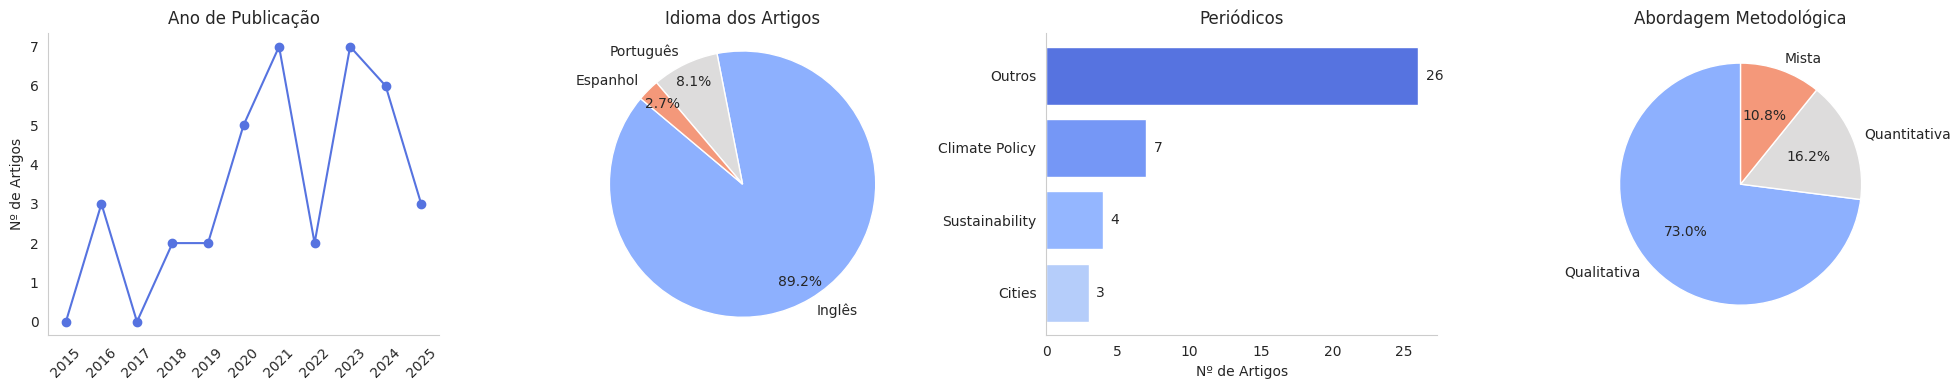

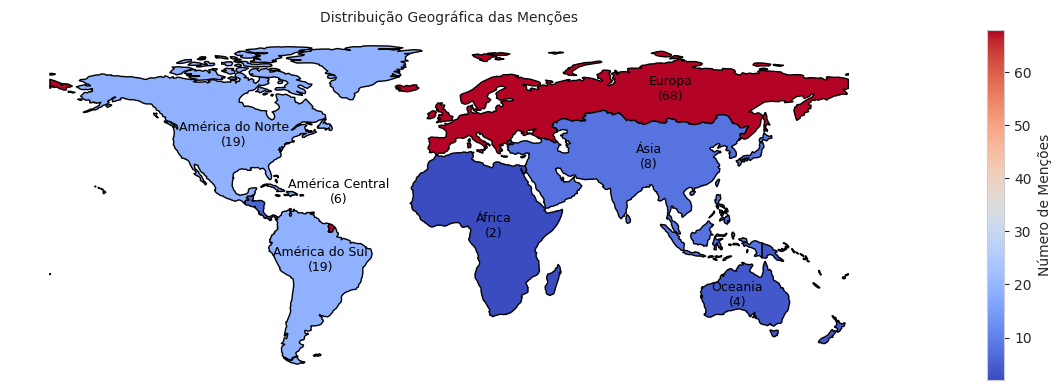

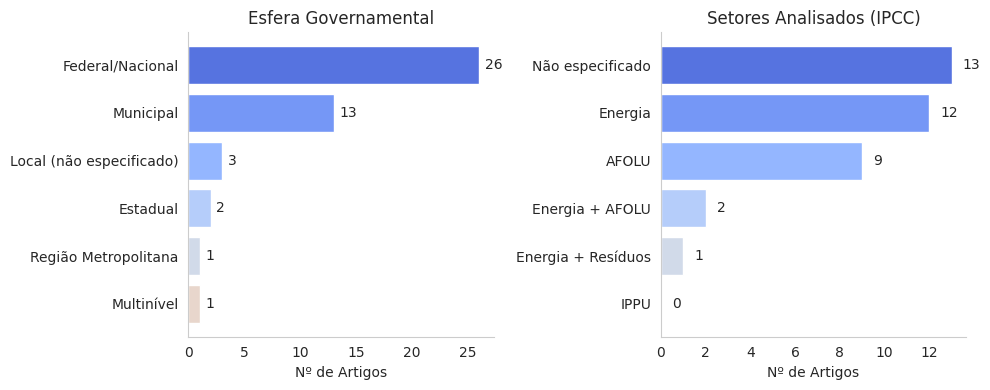

In [17]:
# -----------------------------
# DADOS
# -----------------------------
anos = ['2015','2016', '2017','2018', '2019','2020', '2021', '2022','2023', '2024', '2025']
artigos_ano = [0,3,0,2,2,5, 7,2, 7, 6,3]

idiomas = ['Inglês', 'Português', 'Espanhol']
artigos_idioma = [33, 3, 1]

periodicos = ['Climate Policy', 'Sustainability', 'Cities', 'Outros']
artigos_periodicos = [7, 4, 3, 26]

esferas = ['Federal/Nacional', 'Municipal', 'Estadual', 'Local (não especificado)', 'Região Metropolitana', 'Multinível']
artigos_esfera = [26, 13, 2, 3, 1, 1]

metodologias = ['Qualitativa', 'Quantitativa', 'Mista']
artigos_metodologia = [27, 6, 4]

setores = ['Energia', 'AFOLU', 'Energia + AFOLU', 'Energia + Resíduos', 'IPPU', 'Não especificado']
artigos_setores = [12, 9, 2, 1, 0, 13]

# DataFrames ordenados
df_periodicos = pd.DataFrame({'periodico': periodicos, 'artigos': artigos_periodicos}).sort_values(by='artigos', ascending=False)
df_esferas = pd.DataFrame({'esfera': esferas, 'artigos': artigos_esfera}).sort_values(by='artigos', ascending=False)
df_setores = pd.DataFrame({'setor': setores, 'artigos': artigos_setores}).sort_values(by='artigos', ascending=False)

# Paletas
bar_palette = sns.color_palette("coolwarm", 10)
pie_colors_idioma = sns.color_palette("coolwarm", len(idiomas))
pie_colors_metodologias = sns.color_palette("coolwarm", len(metodologias))

# -----------------------------
# LINHA 1 – GRÁFICOS 1 a 4
# -----------------------------
fig1, axs1 = plt.subplots(1, 4, figsize=(20, 4))

# 1. Ano de publicação
axs1[0].plot(anos, artigos_ano, marker='o', color=bar_palette[0])
axs1[0].set_title('Ano de Publicação')
axs1[0].set_ylabel('Nº de Artigos')
axs1[0].tick_params(axis='x', rotation=45)
axs1[0].grid(False)
sns.despine(ax=axs1[0])

# 2. Idioma
axs1[1].pie(artigos_idioma, labels=idiomas, autopct='%1.1f%%', startangle=140,
            colors=pie_colors_idioma, textprops={'fontsize': 10}, pctdistance=0.85, radius=1.1)
axs1[1].set_title('Idioma dos Artigos')

# 3. Periódicos
axs1[2].barh(df_periodicos['periodico'], df_periodicos['artigos'], color=bar_palette[:len(df_periodicos)])
axs1[2].invert_yaxis()
axs1[2].set_title('Periódicos')
axs1[2].set_xlabel('Nº de Artigos')
axs1[2].grid(False)
sns.despine(ax=axs1[2])

# Rótulos internos gráfico 3
for i, v in enumerate(df_periodicos['artigos']):
    axs1[2].text(v + 0.5, i, str(v), ha='left', va='center', fontsize=10) # Add labels

# 4. Abordagem Metodológica
axs1[3].pie(artigos_metodologia, labels=metodologias, autopct='%1.1f%%', startangle=90,
            colors=pie_colors_metodologias, textprops={'fontsize': 10})
axs1[3].set_title('Abordagem Metodológica')

plt.tight_layout()
plt.show()

# -----------------------------
# LINHA 2 – GRÁFICO 5 (Mapa)
# -----------------------------

# Lista dos países da América Central
paises_america_central = [
    "Belize", "Guatemala", "Honduras", "El Salvador", "Nicaragua",
    "Costa Rica", "Panama"
]

# Carregar shapefile
shapefile = "ne_110m_admin_0_countries.shp"
world = gpd.read_file(shapefile)

# Ajustar continente para países da América Central
world.loc[world["NAME"].isin(paises_america_central), "CONTINENT"] = "Central America"

# Traduzir nomes dos continentes
traduzir_continentes = {
    "Europe": "Europa",
    "South America": "América do Sul",
    "North America": "América do Norte",
    "Asia": "Ásia",
    "Oceania": "Oceania",
    "Africa": "África",
    "Central America": "América Central",
}
world["CONTINENT"] = world["CONTINENT"].map(traduzir_continentes)

mentions = pd.DataFrame({
    "continent": ["Europa", "América do Sul", "América do Norte", "Ásia", "Oceania", "África", "América Central"],
    "mentions": [68, 19, 19, 8, 4, 2,6]
})

continents = world.dissolve(by="CONTINENT").reset_index()
merged = continents.merge(mentions, left_on="CONTINENT", right_on="continent", how="left")
merged = merged.dropna(subset=["mentions"])

pos_labels = {
    "Europa": (100, 60),
    "América do Sul": (-58, -15),
    "América do Norte": (-97, 40),
    "Ásia": (90, 30),
    "Oceania": (130, -30),
    "África": (20, 0),
    "América Central": (-50, 15),
}


fig2, ax2 = plt.subplots(figsize=(20, 4))
merged.plot(
    column="mentions", cmap="coolwarm", edgecolor="black",
    legend=True, legend_kwds={"label": "Número de Menções"}, ax=ax2
)

for idx, row in merged.iterrows():
    c = row['continent']
    if c in pos_labels:
        x, y = pos_labels[c]
        ax2.text(x, y, f"{c}\n({int(row['mentions'])})", ha='center', fontsize=9, color='black')

ax2.set_title("Distribuição Geográfica das Menções", fontsize=10)
ax2.axis('off')
plt.tight_layout()
plt.show()

# -----------------------------
# LINHA 3 – GRÁFICOS 6 e 7
# -----------------------------
fig3, axs3 = plt.subplots(1, 2, figsize=(10, 4))  # Largura 10 para aproximar do gráfico 3, altura maior para equilibrar

# 6. Esfera Governamental
axs3[0].barh(df_esferas['esfera'], df_esferas['artigos'], color=bar_palette[:len(df_esferas)])
axs3[0].invert_yaxis()
axs3[0].set_title('Esfera Governamental')
axs3[0].set_xlabel('Nº de Artigos')
axs3[0].grid(False)
sns.despine(ax=axs3[0])

# Rótulos internos gráfico 6
for i, v in enumerate(df_esferas['artigos']):
    axs3[0].text(v + 0.5, i, str(v), ha='left', va='center', fontsize=10) # Add labels

# 7. Setores Analisados (IPCC)
axs3[1].barh(df_setores['setor'], df_setores['artigos'], color=bar_palette[:len(df_setores)])
axs3[1].invert_yaxis()
axs3[1].set_title('Setores Analisados (IPCC)')
axs3[1].set_xlabel('Nº de Artigos')
axs3[1].grid(False)
sns.despine(ax=axs3[1])

# Rótulos internos gráfico 7
for i, v in enumerate(df_setores['artigos']):
    axs3[1].text(v + 0.5, i, str(v), ha='left', va='center', fontsize=10) # Add labels

plt.tight_layout()
plt.show()
